# CME ETH Futures vs Lido stETH prices

### Libs

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Functions

In [42]:
def show_scatter(dataset, tf):

    # Set the size of the plot
    plt.figure(figsize=(10, 6))  # Width and height in inches

    # Add regression line
    sns.regplot(x='Price_steth', y='Price_cme', data=dataset, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

    # Plotting the dataset
    sns.scatterplot(x='Price_steth', y='Price_cme', data=dataset)
    plt.title(f'Scatter Plot of CME Price vs stEth Price on {tf} timeframe')
    plt.xlabel('Price CME')
    plt.ylabel('Price stEth')
    plt.show()

In [43]:
def show_distribution(df, price_name):

    # Plotting a histogram of the Price data along with a KDE overlay
    sns.histplot(df, bins=30, kde=True, edgecolor='darkblue', linewidth=0.1)
    plt.title(f'Distribution of {price_name} Price')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

In [44]:
def remove_outliers(df):
    for col in ['Price_cme','Price_steth']:
        # Calculate the 99th percentile
        upper_limit = df[col].quantile(0.99)

        # Filter the dataset to remove extreme outliers
        df = df[df[col] <= upper_limit]
    return df

In [45]:
def show_correlation(df):
    # Calculate Kendall’s Tau Correlation
    kendall_correlation = df['Price_cme'].corr(df['Price_steth'], method='kendall')
    print(f"Kendall's Tau Correlation Coefficient:   {kendall_correlation * 100:.4f}")

    # Calculate Spearman's Rank Correlation
    spearman_correlation = df['Price_cme'].corr(df['Price_steth'], method='spearman')
    print(f"Spearman's Rank Correlation Coefficient: {spearman_correlation * 100:.4f}")

    # Pearson coefficient has been excluded as price does not follow a normal distribution

### Datasets

In [46]:
col_names = ['Entry Date UTC', 'Price']

# Load csv files for CME data
cme_data_1h = pd.read_csv('../data/cme/cme_1h.csv', usecols=col_names)
cme_data_5m = pd.read_csv('../data/cme/cme_5m.csv', usecols=col_names)
cme_data_1m = pd.read_csv('../data/cme/cme_1m.csv', usecols=col_names)

# Date conversion & remove outliers
for df in (cme_data_1h, cme_data_5m, cme_data_1m):
    df['Entry Date UTC'] = pd.to_datetime(df['Entry Date UTC'], format='%Y%m%dT%H:%M:%S')

# Load csv files for stEth data
steth_data_1h = pd.read_csv('../data/steth/steth_1h.csv', usecols=col_names)
steth_data_5m = pd.read_csv('../data/steth/steth_5m.csv', usecols=col_names)
steth_data_1m = pd.read_csv('../data/steth/steth_1m.csv', usecols=col_names)

# Date conversion & remove outliers
for df in (steth_data_1h, steth_data_5m, steth_data_1m):
    df['Entry Date UTC'] = pd.to_datetime(df['Entry Date UTC'])

# Merge datasets using date
dataset_1h = pd.merge(cme_data_1h, steth_data_1h, on='Entry Date UTC', suffixes=('_cme', '_steth'))
dataset_5m = pd.merge(cme_data_5m, steth_data_5m, on='Entry Date UTC', suffixes=('_cme', '_steth'))
dataset_1m = pd.merge(cme_data_1m, steth_data_1m, on='Entry Date UTC', suffixes=('_cme', '_steth'))

# Remove outliers
dataset_1h = remove_outliers(dataset_1h)
dataset_5m = remove_outliers(dataset_5m)
dataset_1m = remove_outliers(dataset_1m)

# dataset_1h = remove_outliers(dataset_1h)

print(dataset_1h.head())


        Entry Date UTC  Price_cme  Price_steth
68 2022-01-05 21:00:00     3580.5      3604.62
69 2022-01-05 23:00:00     3540.5      3529.11
70 2022-01-06 00:00:00     3535.0      3535.29
71 2022-01-06 01:00:00     3531.5      3528.47
72 2022-01-06 02:00:00     3511.0      3515.45


### Time Range

In [47]:
def set_time_range(dataset):
    return dataset[(dataset['Entry Date UTC'] >= '2022-01-03') & (dataset['Entry Date UTC'] <= '2024-03-31')]

dataset_1h, dataset_5m, dataset_1m = [set_time_range(df) for df in [dataset_1h, dataset_5m, dataset_1m]]

print(f'1h: \n{pd.concat([dataset_1h.head(1), dataset_1h.tail(1)])}\n')
print(f'5m: \n{pd.concat([dataset_5m.head(1), dataset_5m.tail(1)])}\n')
print(f'1m: \n{pd.concat([dataset_1m.head(1), dataset_1m.tail(1)])}')


1h: 
           Entry Date UTC  Price_cme  Price_steth
68    2022-01-05 21:00:00     3580.5      3604.62
18815 2024-03-31 00:00:00     3598.0      3500.16

5m: 
            Entry Date UTC  Price_cme  Price_steth
540    2022-01-04 21:00:00     3824.5      3614.73
225791 2024-03-31 00:00:00     3598.0      3500.16

1m: 
             Entry Date UTC  Price_cme  Price_steth
2699    2022-01-04 20:59:00     3824.5      3614.73
1128957 2024-03-31 00:00:00     3598.0      3500.16


### Distributions

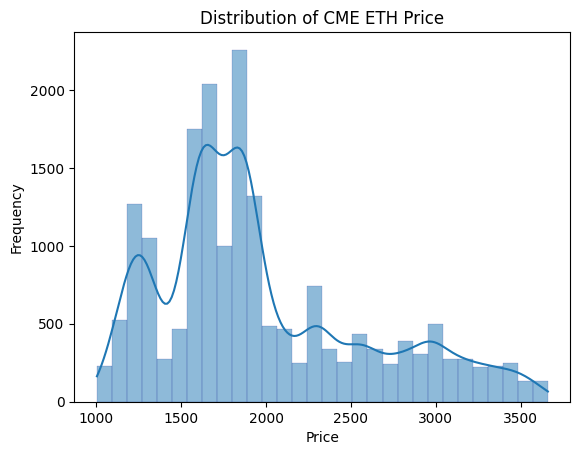

In [48]:
show_distribution(dataset_1h['Price_cme'], 'CME ETH')

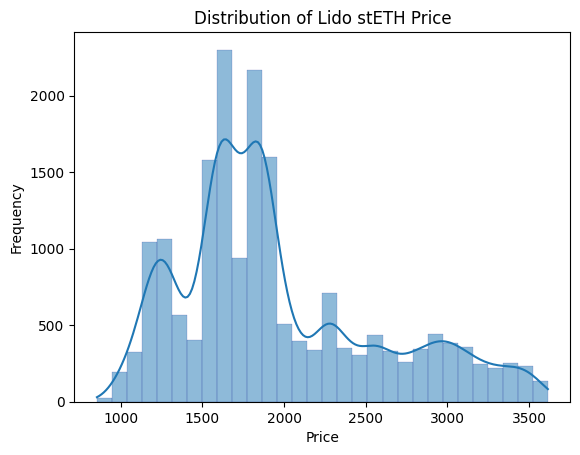

In [49]:
show_distribution(dataset_1h['Price_steth'], 'Lido stETH')

The distribution of price is not normally distributed, showing a multimodal and possibly skewed pattern.

### Scatter Plots

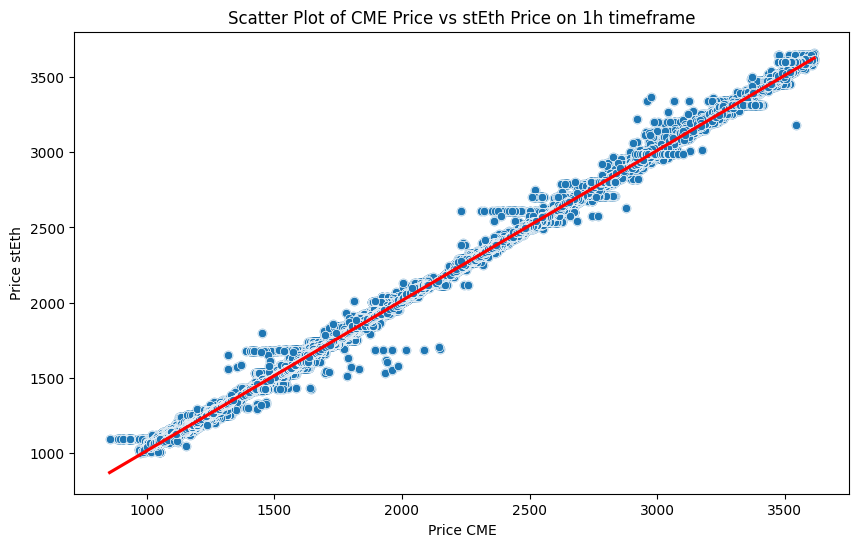

In [50]:
show_scatter(dataset_1h, '1h')

In [51]:
show_correlation(dataset_1h)

Kendall's Tau Correlation Coefficient:   96.5663
Spearman's Rank Correlation Coefficient: 99.6813


In [52]:
dataset_1h.describe()

,Entry Date UTC,Price_cme,Price_steth
count,18457,18457.000000,18457.000000
mean,2023-02-11 08:24:35.342688256,1967.201224,1953.333073
min,2022-01-05 21:00:00,1003.000000,855.190000
25%,2022-07-25 12:00:00,1574.500000,1565.790000
50%,2023-02-11 05:00:00,1828.000000,1818.050000
75%,2023-08-30 18:00:00,2303.000000,2284.070000
max,2024-03-31 00:00:00,3661.000000,3614.510000
std,NaN,613.760323,613.926788


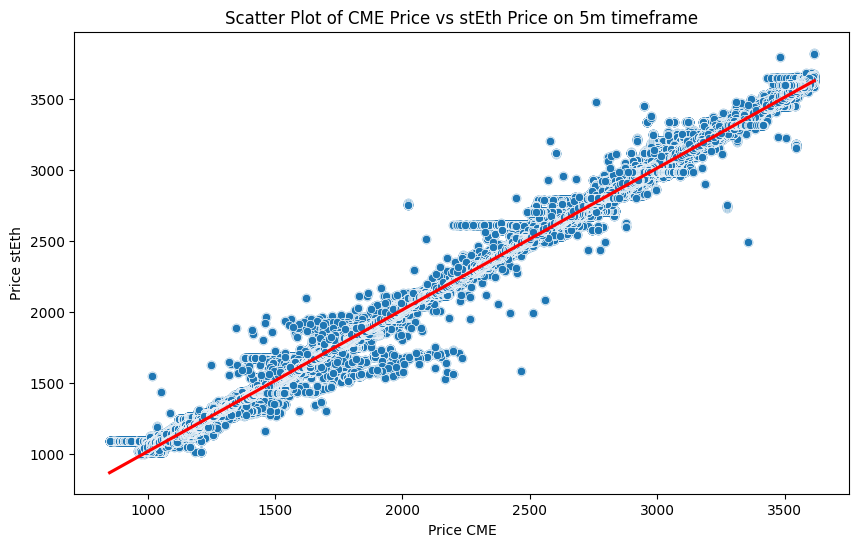

In [53]:
show_scatter(dataset_5m, '5m')

In [54]:
show_correlation(dataset_5m)

Kendall's Tau Correlation Coefficient:   96.5481
Spearman's Rank Correlation Coefficient: 99.6772


In [55]:
dataset_5m.describe()

,Entry Date UTC,Price_cme,Price_steth
count,221497,221497.000000,221497.000000
mean,2023-02-11 07:53:28.946396416,1967.176537,1953.344142
min,2022-01-04 21:00:00,996.000000,850.540000
25%,2022-07-25 11:30:00,1574.500000,1565.990000
50%,2023-02-11 04:05:00,1828.000000,1817.930000
75%,2023-08-30 17:35:00,2303.000000,2284.020000
max,2024-03-31 00:00:00,3824.500000,3616.020000
std,NaN,613.785491,613.973826


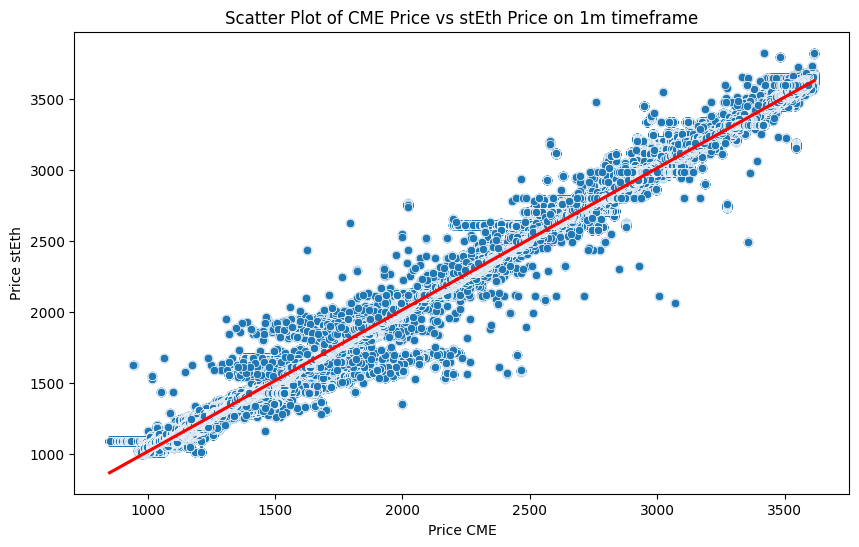

In [56]:
show_scatter(dataset_1m, '1m')

In [57]:
show_correlation(dataset_1m)

Kendall's Tau Correlation Coefficient:   96.5433
Spearman's Rank Correlation Coefficient: 99.6762


In [58]:
dataset_1m.describe()

,Entry Date UTC,Price_cme,Price_steth
count,1107500,1.107500e+06,1.107500e+06
mean,2023-02-11 08:07:10.964316160,1.967190e+03,1.953338e+03
min,2022-01-04 20:59:00,9.960000e+02,8.505400e+02
25%,2022-07-25 11:40:45,1.574500e+03,1.566100e+03
50%,2023-02-11 04:17:30,1.828000e+03,1.817850e+03
75%,2023-08-30 17:52:15,2.303000e+03,2.283990e+03
max,2024-03-31 00:00:00,3.824500e+03,3.616400e+03
std,NaN,6.138068e+02,6.139700e+02


### Outliers hunting

In [59]:
def show_outliers(df, n_times_sd):
    '''
    This function fits a linear regression model, calculates residuals, and prints rows where
    the absolute residuals exceed a specified number of standard deviations from the mean residual, 
    identifying these as outliers.
    '''
    # Fit the regression model
    model = LinearRegression()
    model.fit(df[['Price_cme']], df['Price_steth'])

    # Calculate predicted values
    df['predicted'] = model.predict(df[['Price_cme']])

    # Calculate residuals
    df['residuals'] = df['Price_steth'] - df['predicted']

    # Calculate the absolute residuals to determine the distance from the line
    df['abs_residuals'] = df['residuals'].abs()

    # Define a threshold
    std_dev = df['abs_residuals'].std()
    threshold = n_times_sd * std_dev

    # Filter rows where the absolute residuals are greater than the threshold
    outliers = df[df['abs_residuals'] > threshold]

    print(outliers[['Entry Date UTC', 'Price_cme', 'Price_steth', 'predicted', 'residuals']])


In [60]:
show_outliers(dataset_5m, 18)

            Entry Date UTC  Price_cme  Price_steth    predicted   residuals
8199   2022-02-01 15:15:00     2749.0      2022.93  2734.228627 -711.298627
8200   2022-02-01 15:20:00     2751.5      2022.93  2736.725625 -713.795625
8201   2022-02-01 15:25:00     2764.0      2022.93  2749.210612 -726.280612
8202   2022-02-01 15:30:00     2757.5      2022.93  2742.718419 -719.788419
8203   2022-02-01 15:35:00     2748.5      2022.93  2733.729228 -710.799228
12033  2022-02-15 12:45:00     3109.5      2601.26  3094.295663 -493.035663
12034  2022-02-15 12:50:00     3119.0      2601.26  3103.784254 -502.524254
12035  2022-02-15 12:55:00     3118.5      2601.26  3103.284854 -502.024854
22542  2022-03-25 13:30:00     3199.5      2578.20  3184.187572 -605.987572
33998  2022-05-06 02:10:00     2733.5      3272.60  2718.747243  553.852757
33999  2022-05-06 02:15:00     2738.0      3272.60  2723.241838  549.358162
34000  2022-05-06 02:20:00     2743.0      3272.60  2728.235833  544.364167
34001  2022-